In [ ]:
# terminal/zsh/cmd command
# pip
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd

# be sure to change the file path
# if you have the dataset in another
# directly than the working folder
df = pd.read_csv('winequality-red.csv')

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# New Section

In [ ]:

import tensorflow as tf

# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)

# it drops the training data
# from the original dataframe
val_df = df.drop(train_df.index)

In [ ]:
# calling to (0,1) range
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

range = max_val - min_val
train_df = (train_df - min_val)/(range)

val_df = (val_df- min_val)/range


In [ ]:

# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = [X_train.shape[1]]

input_shape

[11]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1, input_shape = input_shape)
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
input_dim = X_train.shape[1]

model = tf.keras.Sequential([
    tf.keras.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',

			# MAE error is good for
			# numerical predictions
			loss='mae')

In [ ]:

losses = model.fit(X_train, y_train,

                   validation_data=(X_val, y_val),

                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=15,  # total epoch

                   )


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.4340 - val_loss: 0.2823
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2433 - val_loss: 0.1419
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1402 - val_loss: 0.1460
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1587 - val_loss: 0.1501
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1490 - val_loss: 0.1293
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1299 - val_loss: 0.1236
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1284 - val_loss: 0.1240
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1260 - val_loss: 0.1165
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1189 - val_loss: 0.1167
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1170 - val_loss: 0.1137
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1159 - val_loss: 0.1117
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1146 - val_loss: 0.1104
E

In [ ]:
model.predict(X_val.iloc[0:3,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


array([[0.43312335],
       [0.48827618],
       [0.46429378]], dtype=float32)

In [ ]:
y_val.iloc[0:3]

,quality
0,0.4
9,0.4
12,0.4


<Axes: >

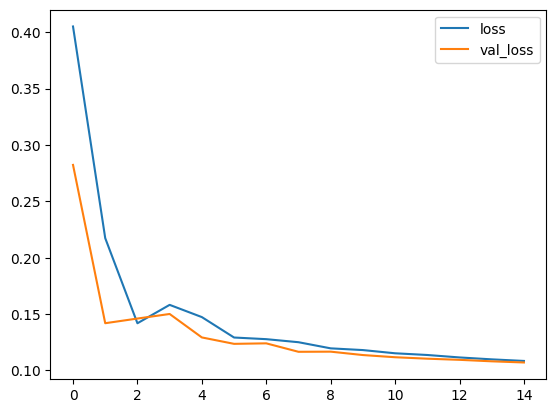

In [ ]:
loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()